In [25]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
# Loading the csv files
timezone_df = pd.read_csv('subject_timezone_log.csv')
registry_df = pd.read_csv('subject_registry.csv')

In [27]:
# Renaming 'SubjectID' to 'subject' for consistency
registry_df.rename(columns={'SubjectID': 'subject'}, inplace=True)

In [28]:
# Filtering the subjects based on the given conditions
eligible_subjects = registry_df[
    (registry_df['ISA'] == 'BP03') & 
    (~registry_df['Actual_Visit'].isin(['ED', 'SF']))
]

In [29]:
# Merge the two dataframes
merged_df = pd.merge(eligible_subjects, timezone_df, on=['Site', 'subject'])

In [30]:
# Count timezone changes for each subject by timezone
heatmap_data = merged_df.groupby(['subject', 'timezone_location']).size().unstack().fillna(0)

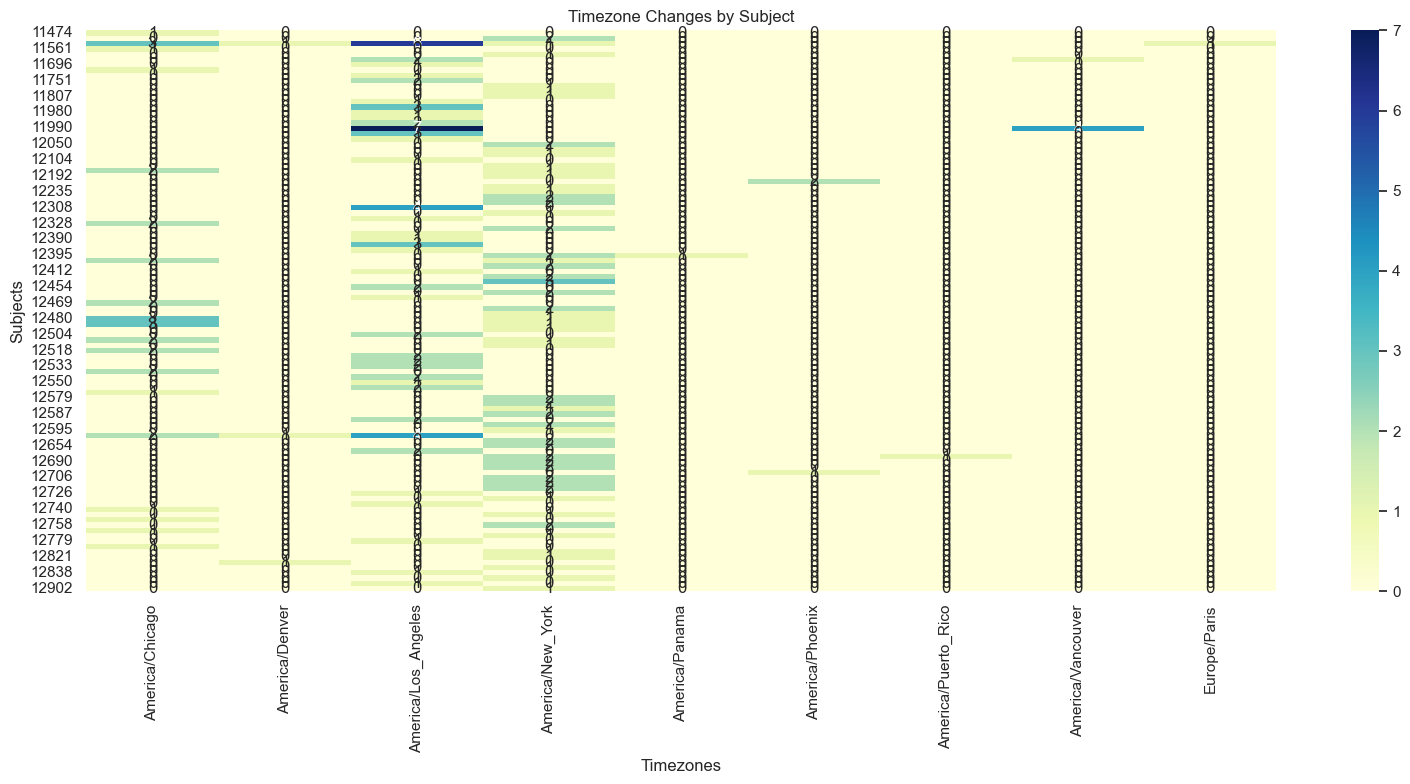

In [32]:
# Heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Timezone Changes by Subject")
plt.xlabel("Timezones")
plt.ylabel("Subjects")
plt.tight_layout()
plt.show()

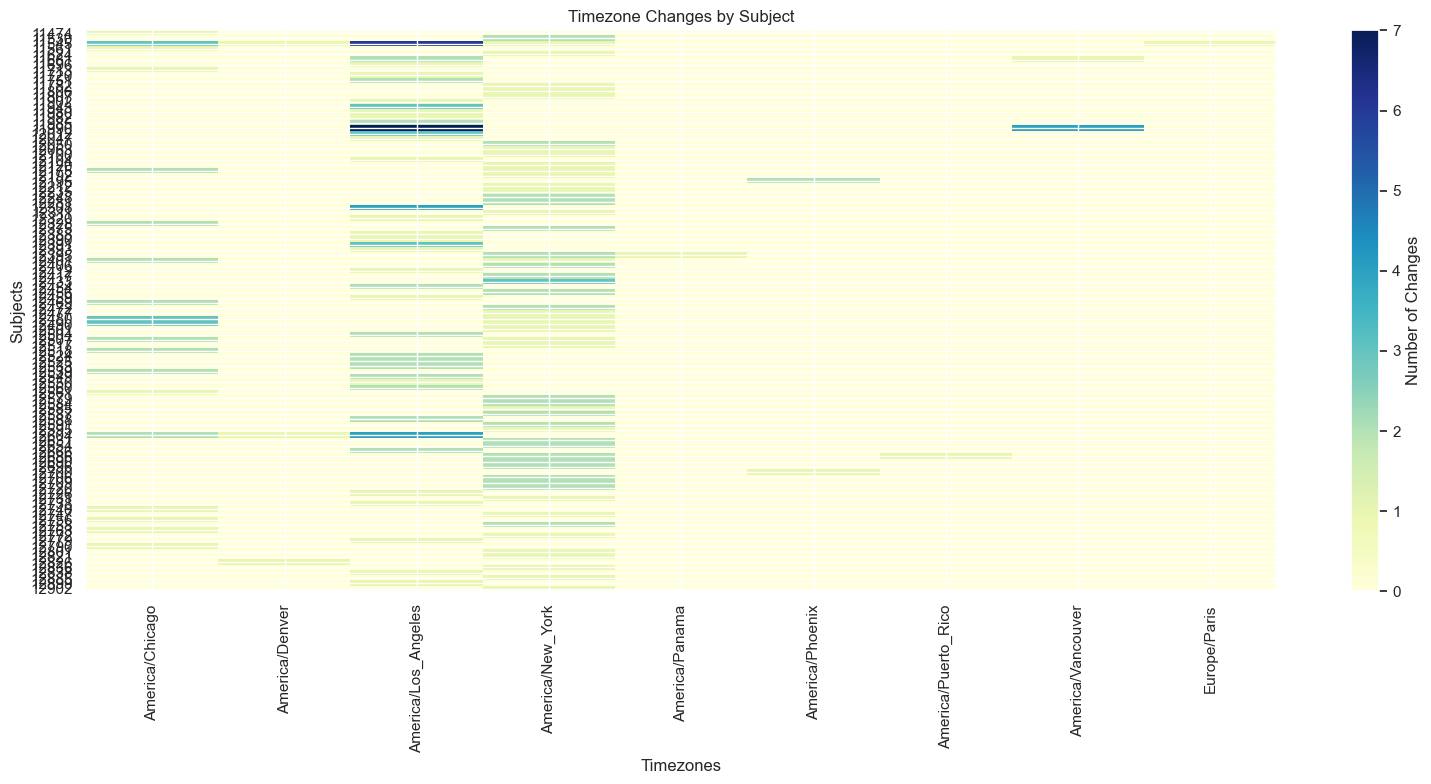

In [33]:
# Heatmap using matplotlib
plt.figure(figsize=(16, 8))
plt.imshow(heatmap_data, cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Number of Changes")
plt.title("Timezone Changes by Subject")
plt.xlabel("Timezones")
plt.ylabel("Subjects")
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.tight_layout()
plt.show()

In [34]:
# Heatmap using pandas
plt.figure(figsize=(16, 8))
heatmap_data.style.background_gradient(cmap='YlGnBu')


timezone_location,America/Chicago,America/Denver,America/Los_Angeles,America/New_York,America/Panama,America/Phoenix,America/Puerto_Rico,America/Vancouver,Europe/Paris
subject,,,,,,,,,
11474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11530,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11545,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
11561,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11624,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11681,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
11696,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11713,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11720,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 1600x800 with 0 Axes>